In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_excel('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer_Churn_TXL2.xlsx')
df.head()

<>:10: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_35456\1011459070.py:10: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_excel('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer_Churn_TXL2.xlsx')


,Churn,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,0,1,0,0,0,0,2
1,0,34,0,2,0,1,3
2,1,2,0,2,0,0,3
3,0,45,0,2,2,1,0
4,1,2,1,0,0,0,2


In [125]:
# Chia dữ liệu thành features (X) và target (y)
X = df.drop(['Churn'], axis=1)  # Loại bỏ cột customerID và cột target 'Churn'
y = df['Churn']

In [126]:
# Chia bộ dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [127]:
# Xây dựng mô hình FNN
fnn_model = Sequential()
fnn_model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
fnn_model.add(Dropout(0.5))
fnn_model.add(Dense(50, activation='relu'))
fnn_model.add(Dropout(0.5))
fnn_model.add(Dense(1, activation='sigmoid'))
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1, restore_best_weights=True)
history = fnn_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7954 - loss: 0.4403 - val_accuracy: 0.8112 - val_loss: 0.4116
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7898 - loss: 0.4355 - val_accuracy: 0.8116 - val_loss: 0.4111
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7916 - loss: 0.4393 - val_accuracy: 0.8116 - val_loss: 0.4127
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7785 - loss: 0.4466 - val_accuracy: 0.8074 - val_loss: 0.4130
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7891 - loss: 0.4414 - val_accuracy: 0.8135 - val_loss: 0.4097
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7868 - loss: 0.4417 - val_accuracy: 0.8102 - val_loss: 0.4099
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7952 - loss: 0.4330 - val_accuracy: 0.8107 - val_loss: 0.4146
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7908 - loss: 0.4364 - val_accuracy: 0.8121 - v

In [146]:
# Đánh giá mô hình trên tập test
loss, accuracy = fnn_model.evaluate(X_test, y_test)
print(f'Accuracy on test data: {accuracy}')

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8170 - loss: 0.3942
Accuracy on test data: 0.812115490436554


In [148]:
# Dự đoán trên dữ liệu mới
y_prep = fnn_model.predict(X_test)
y_prep = (y_prep > 0.5)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [156]:
from sklearn.metrics import confusion_matrix, classification_report
# Đánh giá hiệu suất của mô hình
print('MÔ HÌNH FNN":')
print(f'Accuracy: {accuracy *100:.2f}' ' %')

# In ra confusion matrix và báo cáo classification
print('\nClassification Report:')
print(classification_report(y_test, y_prep))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_prep))

MÔ HÌNH FNN":
Accuracy: 81.21 %

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1560
           1       0.71      0.47      0.57       553

    accuracy                           0.81      2113
   macro avg       0.77      0.70      0.72      2113
weighted avg       0.80      0.81      0.80      2113


Confusion Matrix:
[[1454  106]
 [ 291  262]]


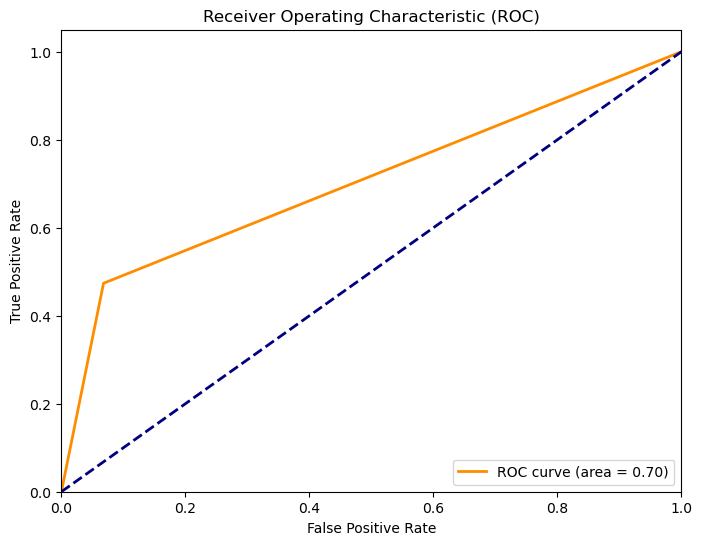

In [159]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Tính false positive rate (fpr), true positive rate (tpr) và ngưỡng (thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_prep)

# Tính diện tích dưới đường cong ROC (AUC - Area Under Curve)
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [154]:
X1 = {
    'tenure': 5,
    'InternetService': 1,
    'OnlineSecurity': 0,
    'TechSupport': 0,
    'Contract': 0,
    'PaymentMethod':3
}

X2 = {
    'tenure': 1,
    'InternetService': 1,
    'OnlineSecurity': 2,
    'TechSupport': 2,
    'Contract': 1,
    'PaymentMethod':0
}


X1_df = pd.DataFrame(X1, index=[0])
X2_df = pd.DataFrame(X2, index=[0])
Y1 = model.predict(X1_df)
Y2 = model.predict(X2_df)
print("Dự đoán bằng mô hình Mạng Noron")
if Y1 == 0:
    print("Dự đoán khách hàng X1: No")
else: 
    print("Dự đoán khách hàng X1: Yes")
if Y2 == 0:
    print("Dự đoán khách hàng X2: No")
else: 
    print("Dự đoán khách hàng X2: Yes")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Dự đoán bằng mô hình Mạng Noron
Dự đoán khách hàng X1: Yes
Dự đoán khách hàng X2: Yes
